In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [11]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite.db")
# engine = create_engine("sqlite:", echo=False)
# engine = create_engine("sqlite:///../Resources/hawaii.sqlite", pool_pre_ping=True)

# conn=engine.connect()

In [13]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
str_date = session.query(func.max(Measurement.date)).first()[0]

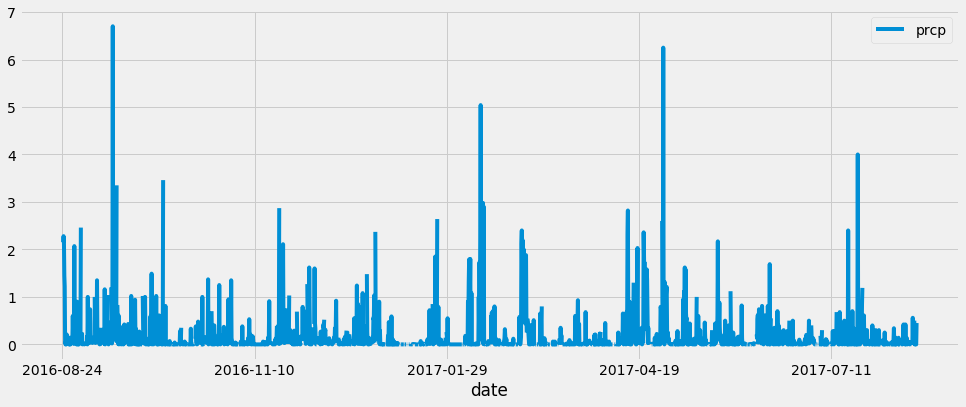

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = dt.datetime.strptime(str_date,'%Y-%m-%d')

# Calculate the date one year from the last date in data set.
prev_year = last_date - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
res = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(res).set_index('date')

# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(15,6))
plt.show()


In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [57]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mas = session.query(Measurement.station,func.count(Measurement.station))\
.order_by(func.count(Measurement.station).desc())\
.group_by(Measurement.station).all()
mas

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs))\
              .filter(Measurement.station == mas[0][0]).first()

(54.0, 85.0, 71.66378066378067)

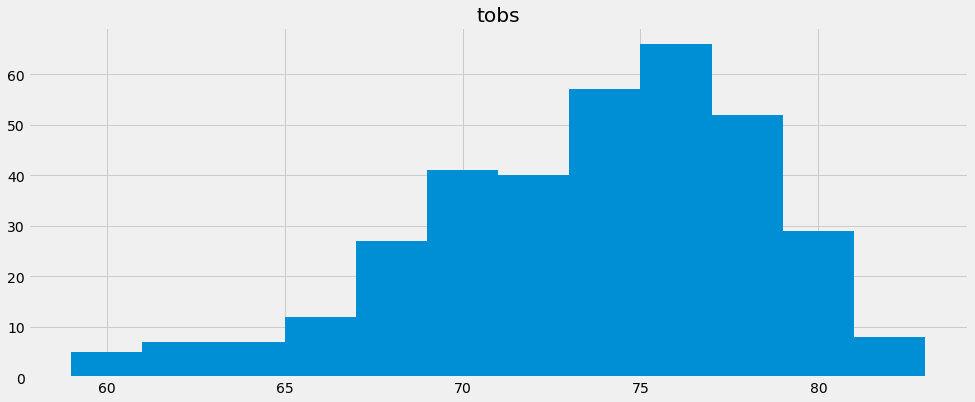

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obs_temp = session.query(Measurement.tobs)\
.filter((Measurement.station==mas[0][0])&(Measurement.date>=prev_year)).all()
pd.DataFrame(obs_temp).hist(bins=12,figsize=(15,6))
plt.show()

# Close session

In [ ]:
# Close Session
session.close()